In [3]:
from lib import *
from statsmodels.stats.multitest import fdrcorrection
import seaborn as sns


def vizblocks(vect_136):
    mask = np.zeros([16,16])
    mask[np.triu_indices(16)] = vect_136
#     mask = np.triu(mask) + np.tril(mask.T, 1)

    plt.figure(figsize=(20,10))
    plt.imshow(mask, vmin = np.min(vect_136), vmax = np.max(vect_136))
    plt.colorbar()
    plt.tick_params(axis='x',         
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)    
    
    for i in range(16):
        if i == 15:
            start = i - .5
            netname = NetOrder['network_name'][i]
            netname = "AMY/\nHIPP"
            plt.axvline(x=start,color='red')
            plt.axhline(y=start,color='red')
            plt.text(15.6, start+.9, netname, fontsize = 17)
            plt.text(start, 17.2, netname, fontsize = 17, rotation = 55)

        else:
            start = i - .5
            nextnet = i+1
            netname = NetOrder['network_name'][i]
            plt.axvline(x=start,color='red')
            plt.axhline(y=start,color='red')
            plt.text(15.6,((start+nextnet)/2)-.2, netname, fontsize = 17)
            plt.text(((start+nextnet)/2)-.7, 16.8, netname, fontsize = 17, rotation = 55)

def vizblocks_no(vect_136):
    mask = np.zeros([15,15])
    mask[np.triu_indices(15)] = vect_136
#     mask[np.tril_indices(15,-1)] = np.repeat(-1,105)
#     mask = np.triu(mask) + np.tril(mask.T, 1)
    plt.figure(figsize=(20,10))
    plt.imshow(mask, vmax = np.max(vect_136), cmap = 'GnBu')
    plt.tick_params(axis='x',         
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)    
    
    for i in range(15):
        if i == 14:
            start = i - .5
            netname = NetOrder['network_name'][i+1]
            netname = "AMY/\nHIPP"
            plt.axvline(x=start,color='red')
            plt.axhline(y=start,color='red')
            plt.text(14.6, start+.9, netname, fontsize = 17)
            plt.text(start, 16.2, netname, fontsize = 17, rotation = 55)

        else:
            start = i - .5
            nextnet = i+1
            netname = NetOrder['network_name'][i+1]
            plt.axvline(x=start,color='red')
            plt.axhline(y=start,color='red')
            plt.text(14.6,((start+nextnet)/2)-.2, netname, fontsize = 17)
            plt.text(((start+nextnet)/2)-.7, 15.8, netname, fontsize = 17, rotation = 55)



    
def reorder_block_scores(scores):
    temp4 = list()
    temp1 = [np.mean(scores[i:i+20]) for i in range(0,len(scores),20)]
    temp2 = [temp1[i:i+136] for i in range(0,len(temp1),136)]
    for i in range(0,136):
        temp3 = [sub[i] for sub in temp2]
        temp4.append(np.mean(temp3))
    return temp4

def reorder_block_null_scores(scores):
    temp4 = []
    temp = [np.mean(scores[i:i+20]) for i in range(0,len(scores),20)]
    temp2 = [temp[i:i+50] for i in range(0,len(temp),50)]
    temp3 = [temp2[i:i+136] for i in range(0,len(temp2),136)]
    nullz = list()
    for null in range(50):
        null1 = list()
        for net in range(136):
            counter = list()
            for i in range(78):
                counter.append(temp3[i][net][null])
            null1.append(np.mean(counter))
        nullz.append(null1)
    wtf = list()
    for j in range(136):
        templist=list()
        for i in range(50):
            templist.append(nullz[i][j])
        wtf.append(templist)
    return wtf

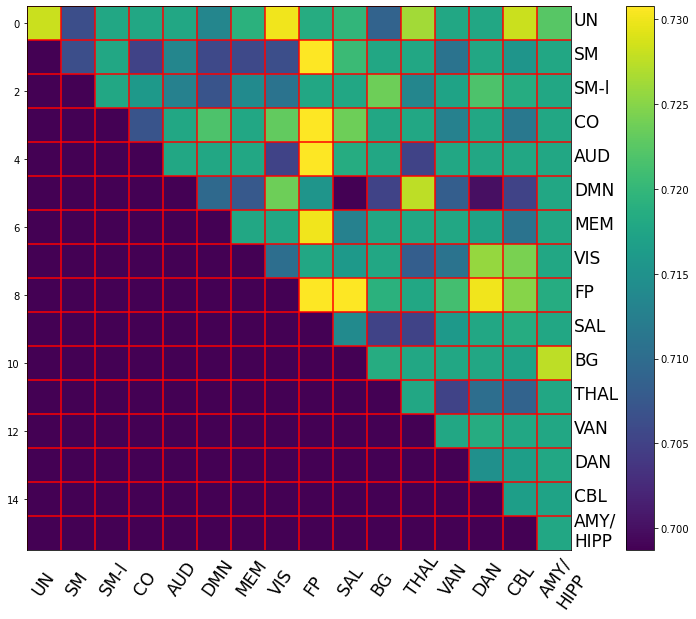

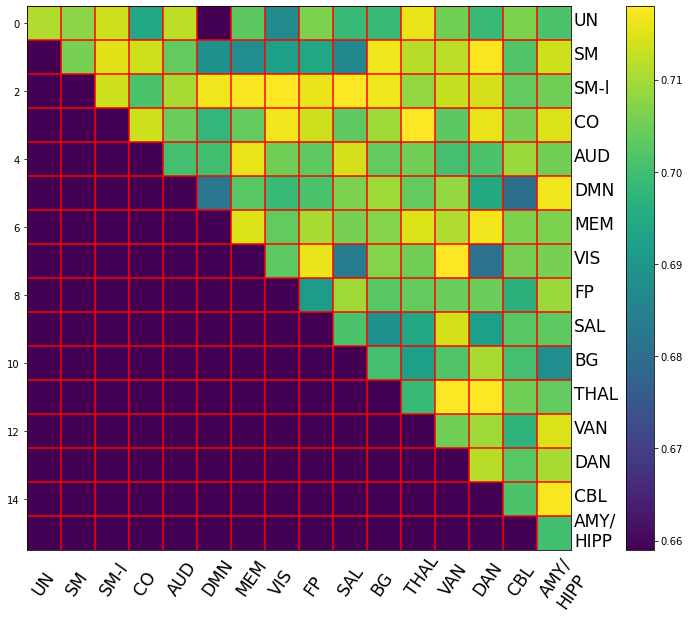

In [4]:
adult_block_scores = pd.read_csv('adult_block_scores.txt', header=None)
child_block_scores = pd.read_csv('child_block_scores.txt', header=None)
adult_block_scores = reorder_block_scores(adult_block_scores)
child_block_scores = reorder_block_scores(child_block_scores)
vizblocks(adult_block_scores)
vizblocks(child_block_scores)

In [5]:
# # Read in original data
# adult_block_scores_null = pd.read_csv('blocknulls1/adult_nulls_scores_blocks.txt', header=None)
# child_block_scores_null = pd.read_csv('blocknulls1/child_nulls_scores_blocks.txt', header=None)
# adult_block_scores_null2 = pd.read_csv('blocknulls2/adult_nulls_scores_blocks.txt', header=None)
# child_block_scores_null2 = pd.read_csv('blocknulls2/child_nulls_scores_blocks.txt', header=None)

# # Reorder data to a plottable format, This is computationally intense...
# adult_block_scores_null_processed = reorder_block_null_scores(adult_block_scores_null)
# child_block_scores_null_processed = reorder_block_null_scores(child_block_scores_null)
# adult_block_scores_null_processed2 = reorder_block_null_scores(adult_block_scores_null2)
# child_block_scores_null_processed2 = reorder_block_null_scores(child_block_scores_null2)

# # Turn above list of lists into datafraes
# adult_block_scores_null_processed = pd.DataFrame(adult_block_scores_null_processed)
# child_block_scores_null_processed = pd.DataFrame(child_block_scores_null_processed)
# adult_block_scores_null_processed2 = pd.DataFrame(adult_block_scores_null_processed2)
# child_block_scores_null_processed2 = pd.DataFrame(child_block_scores_null_processed2)

# # Save dataframes to not have to run this step every time
# adult_block_scores_null_processed.to_csv('adult_block_scores_null_processed',index=False)
# child_block_scores_null_processed.to_csv('child_block_scores_null_processed',index=False)
# adult_block_scores_null_processed2.to_csv('adult_block_scores_null_processed2',index=False)
# child_block_scores_null_processed2.to_csv('child_block_scores_null_processed2',index=False)
adult_block_scores_null_processed = pd.read_csv('adult_block_scores_null_processed')
child_block_scores_null_processed = pd.read_csv('child_block_scores_null_processed')
adult_block_scores_null_processed2 = pd.read_csv('adult_block_scores_null_processed2')
child_block_scores_null_processed2 = pd.read_csv('child_block_scores_null_processed2')

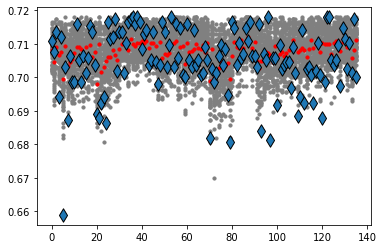

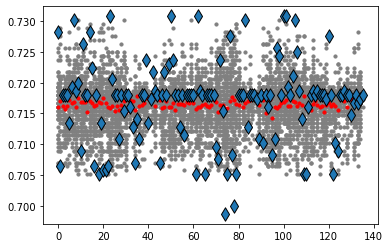

In [6]:
fig, ax = plt.subplots()

for i in range(0,136):
    ax.scatter(np.repeat(i,50), child_block_scores_null_processed.iloc[i,:], 10, color = 'grey')

ax.scatter(np.arange(0,136), np.mean(child_block_scores_null_processed, 1), 10, color = 'r')

ax.scatter(np.arange(0,136), child_block_scores, 90, marker='d',edgecolor='black')

fig, ax = plt.subplots()

for i in range(0,136):
    ax.scatter(np.repeat(i,50), adult_block_scores_null_processed.iloc[i,:], 10, color = 'grey')

ax.scatter(np.arange(0,136), np.mean(adult_block_scores_null_processed, 1), 10, color = 'r')

ax.scatter(np.arange(0,136), adult_block_scores, 90, marker='d',edgecolor='black')



In [7]:
ps_child = []

for i in range(136):
    ps_child.append((50-sum(child_block_scores[i] < child_block_scores_null_processed.iloc[i]))/50)
        
stf_child = np.array(ps_child)<=.05
stf_child_fdr, ps_child_fdr = fdrcorrection(ps_child)

ps_adult = []

for i in range(136):
    ps_adult.append((50-sum(adult_block_scores[i] < adult_block_scores_null_processed.iloc[i]))/50)
        
stf_adult = np.array(ps_adult)<=.05
stf_adult_fdr, ps_adult_fdr = fdrcorrection(ps_adult)

In [8]:
ps_child2 = []

for i in range(136):
    ps_child2.append((50-sum(child_block_scores[i] < child_block_scores_null_processed2.iloc[i]))/50)
        
stf_child2 = np.array(ps_child2)<=.05
stf_child_fdr2, ps_child_fdr2 = fdrcorrection(ps_child2)

ps_adult2 = []

for i in range(136):
    ps_adult2.append((50-sum(adult_block_scores[i] < adult_block_scores_null_processed2.iloc[i]))/50)
        
stf_adult2 = np.array(ps_adult2)<=.05
stf_adult_fdr2, ps_adult_fdr2 = fdrcorrection(ps_adult2)

In [9]:
combined_child, ps_combined_child = fdrcorrection((np.array(ps_child) +np.array(ps_child2))/2)
combined_adult, ps_combined_adult = fdrcorrection((np.array(ps_adult) +np.array(ps_adult2))/2)

combined_child_noUN, ps_combined_child_noUN = fdrcorrection((np.array(ps_child[16:]) +np.array(ps_child2[16:]))/2)
combined_adult_noUN, ps_combined_adult_noUN = fdrcorrection((np.array(ps_adult[16:]) +np.array(ps_adult2[16:]))/2)

In [10]:
mask = np.zeros([16,16])
mask[np.triu_indices(16)] = ps_combined_child

In [11]:
mask[5,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14315789, 0.44461538, 0.83566265, 0.83566265, 0.91652174,
       1.        , 0.83566265, 1.        , 0.255     , 0.07555556,
       1.        ])

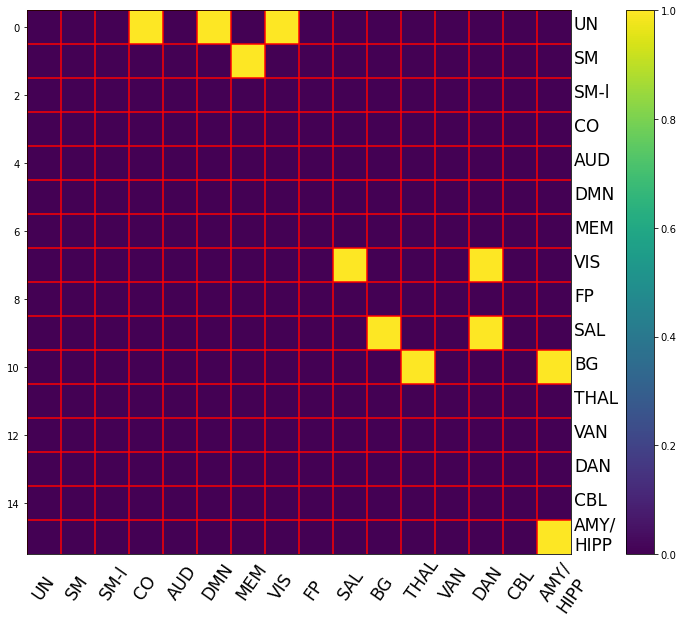

In [12]:
vizblocks(combined_child)

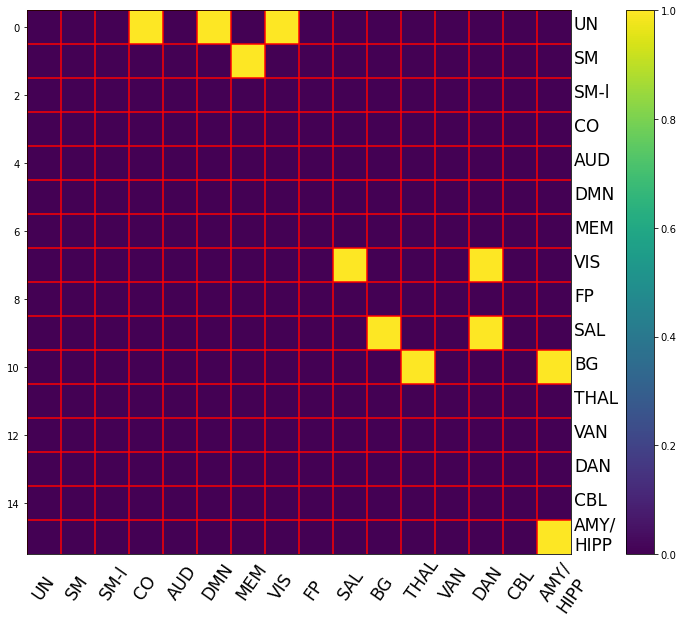

In [13]:
vizblocks(combined_child)

Text(0.5, 1.0, 'Adult')

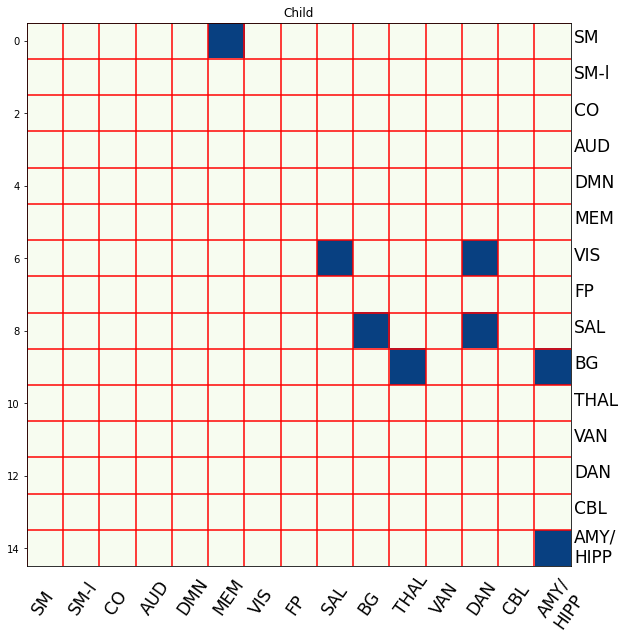

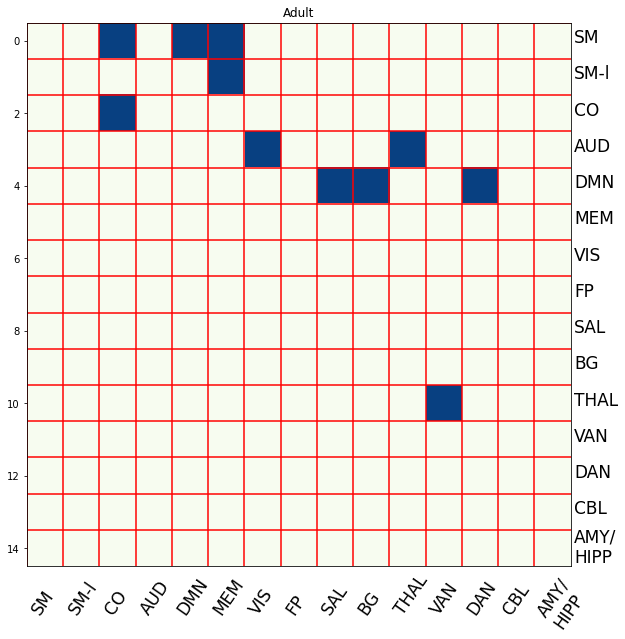

In [14]:
vizblocks_no(combined_child_noUN)
plt.title("Child")

vizblocks_no(combined_adult_noUN)
plt.title("Adult")

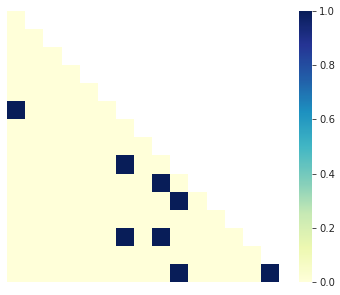

In [373]:
def vizblocks_nos(vect_136):
    mask = np.zeros([15,15])
    mask[np.triu_indices(15)] = vect_136
    mask = np.triu(mask, 1) + np.tril(mask.T, 1)
    
    mask2 = np.zeros_like(mask)
    mask2[np.triu_indices_from(mask2,1)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7,5))
        ax = sns.heatmap(mask, mask=mask2, yticklabels=False, vmax = np.max(vect_136), square=True, cmap ="YlGnBu")

    plt.tick_params(axis='x',         
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)    
    
#     for i in range(15):
#         if i == 14:
#             start = i - .5
#             netname = NetOrder['network_name'][i+1]
#             netname = "AMY/\nHIPP"
#             plt.axvline(x=start,color='red')
#             plt.axhline(y=start,color='red')
#             plt.text(14.6, start+.9, netname, fontsize = 17)
#             plt.text(start, 16.2, netname, fontsize = 17, rotation = 55)

#         else:
#             start = i - .5
#             nextnet = i+1
#             netname = NetOrder['network_name'][i+1]
#             plt.axvline(x=start,color='red')
#             plt.axhline(y=start,color='red')
#             plt.text(14.6,((start+nextnet)/2)-.2, netname, fontsize = 17)
#             plt.text(((start+nextnet)/2)-.7, 15.8, netname, fontsize = 17, rotation = 55)


vizblocks_nos(combined_child_noUN)



# Permute Block Code and permute block nulls code below

In [ ]:
cv = LeaveOneOut()
scores = []

for train_ix, test_ix in cv.split(Adult_DF):
    
    # For each split, create the respective training and test set
    X_train, X_test = Adult_DF[train_ix, :], Adult_DF[test_ix, :]
    y_train, y_test = labels_child[train_ix], labels_child[test_ix]

    # Train the model
    clf = svm.SVC(kernel='linear', C=1, random_state=1)
    clf.fit(X_train, y_train)
        
    for counter, net1 in enumerate(NetOrder['network_name']):
        
        for net2 in NetOrder['network_name'][-(16-counter):]:
        
            block_inds = get_block_inds(net1,net2)
  
            temp_test_sub = np.copy(X_test)

            for j in range(20):
            
                for i in range(len(block_inds)):

                    randsamp = random.randint(0,76)
                    temp_test_sub[0, block_inds[i]] = X_train[randsamp,block_inds[i]]

                loo_score = clf.score(temp_test_sub, y_test)

                scores.append(loo_score)    
                
            print(net1,net2)


# adult_block_scores = scores
# with open('adult_block_scores.txt', 'w') as f:
#     for item in adult_block_scores:
#         f.write("%s\n" % item)



In [ ]:
# Code to create nulls
block_nulls = []

for counter, net1 in enumerate(NetOrder['network_name']):

    for net2 in NetOrder['network_name'][-(16-counter):]:

        block_inds = len(get_block_inds(net1,net2))
    
        temp = []
        
        for null in range(2):
        
            temp.append(random.sample(list(range(0,45149)),block_inds))
        
        block_nulls.append(temp)

In [ ]:
# Code to run nulls

cv = LeaveOneOut()
scores = []

# Loop over the LOOCV splits indicies
for train_ix, test_ix in cv.split(Child_DF):
    
    # For each split, create the respective training and test set
    X_train, X_test = Child_DF[train_ix, :], Child_DF[test_ix, :]
    y_train, y_test = labels_child[train_ix], labels_child[test_ix]

    # Train the model
    clf = svm.SVC(kernel='linear', C=1, random_state=1)
    clf.fit(X_train, y_train)
        
    for null_list in block_nulls:
      
        for null in null_list:

            temp_test_sub = np.copy(X_test)

            # number of permutations
            for j in range(20):

                # Permute the test subjects DMN connections individually 
                for i in range(len(null)):
                    randsamp = random.randint(0,76)
                    temp_test_sub[0, null[i]] = X_train[randsamp, null[i]]
    #                 temp_test_sub[0, network_inds[i]] = 0


                # Test the model using the permuted feature set
                loo_score = clf.score(temp_test_sub, y_test)

                # Keep track of the accuracy of the LOOCV with DMN permuted
                scores.append(loo_score)         

